In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data  = pd.read_csv('AMZNtrain.csv',index_col='Date',parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [5]:
data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

<AxesSubplot:xlabel='Date'>

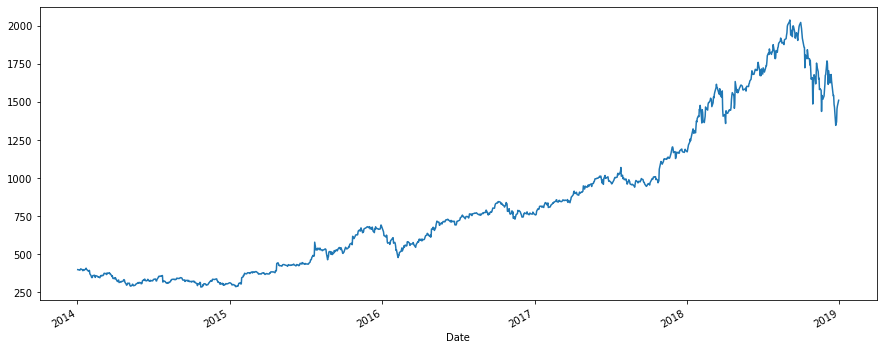

In [6]:
data['Open'].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

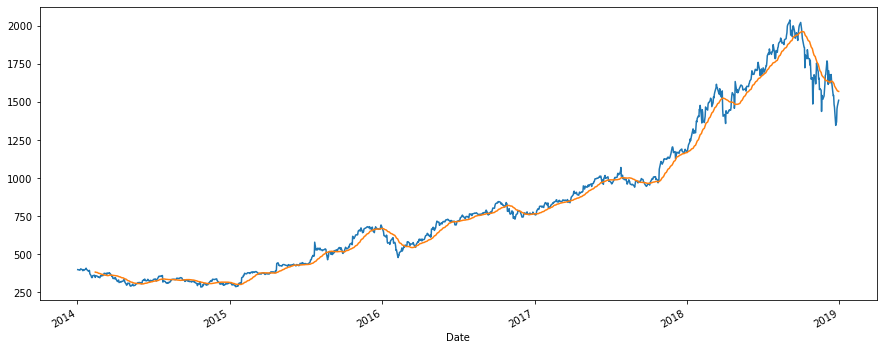

In [7]:
data['Open'].plot(figsize=(15,6))
data.rolling(window = 30).mean()['Close'].plot()

In [8]:
train_set = data['Open']
train_set= pd.DataFrame(train_set)

In [9]:
from sklearn.preprocessing import MinMaxScaler
me = MinMaxScaler(feature_range = (0,1))
train_set_scaled = me.fit_transform(train_set)

In [11]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [22]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0238
Epoch 2/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0038
Epoch 3/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0029: 
Epoch 4/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0025
Epoch 5/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0035
Epoch 6/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0027
Epoch 7/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0023
Epoch 8/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0027
Epoch 9/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0027
Epoch 10/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0027
Epoch 11/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0025
Epoch 12/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0024
Epoch 13/100
38/38 [=

38/38 [==============================] - 4s 105ms/step - loss: 0.0011


In [27]:
data_test = pd.read_csv('AMZNtest.csv',index_col='Date',parse_dates=True)

In [28]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [29]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-01-02 to 2019-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       21 non-null     float64
 1   High       21 non-null     float64
 2   Low        21 non-null     float64
 3   Close      21 non-null     float64
 4   Adj Close  21 non-null     float64
 5   Volume     21 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


In [30]:
test_set = data_test['Open']
test_set= pd.DataFrame(test_set)

In [31]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-01-02 to 2019-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [35]:
dataset_total = pd.concat((data['Open'], data_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = me.transform(inputs)
X_test= []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = me.inverse_transform(predicted_stock_price)

In [36]:
predicted_stock_price= pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


In [37]:
real_stock_price = data_test.iloc[:,1:2].values

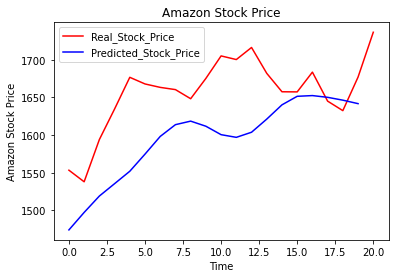

In [38]:
plt.plot(real_stock_price, color = 'red',label='Real_Stock_Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted_Stock_Price')
plt.title('Amazon Stock Price')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()